<a href="https://colab.research.google.com/github/jennif8r/RedeNeural/blob/main/adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adaline

####Manual:
- Composta por apenas um neuronio
- N entradas, 1 saída
- função de ativação: linear (+ step)
- Por definição, é um classificador binario linear
- Pode ser adaptado para efetuar regressão linear
- Aplique somente em problemas linearmente separáveis ou lineares (garantia de sucesso!)
- O Adaline sabe o "quanto" erroum enquanto o Perceptron sabe apenas se errou ou não.
- Pode-se aplicar o Gradiente Descendente (por causa da derivada)

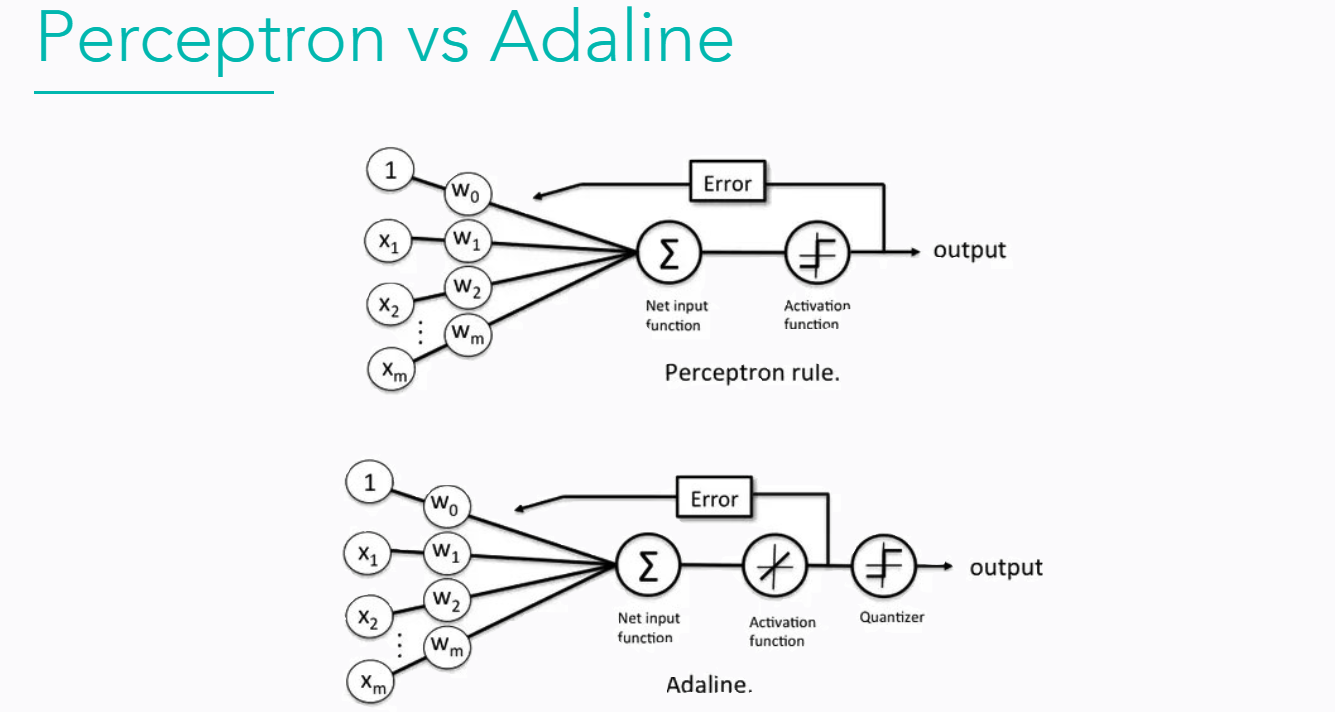

Com o quantizer o adaline consegue saber o quanto ele errou e não somente se errou.

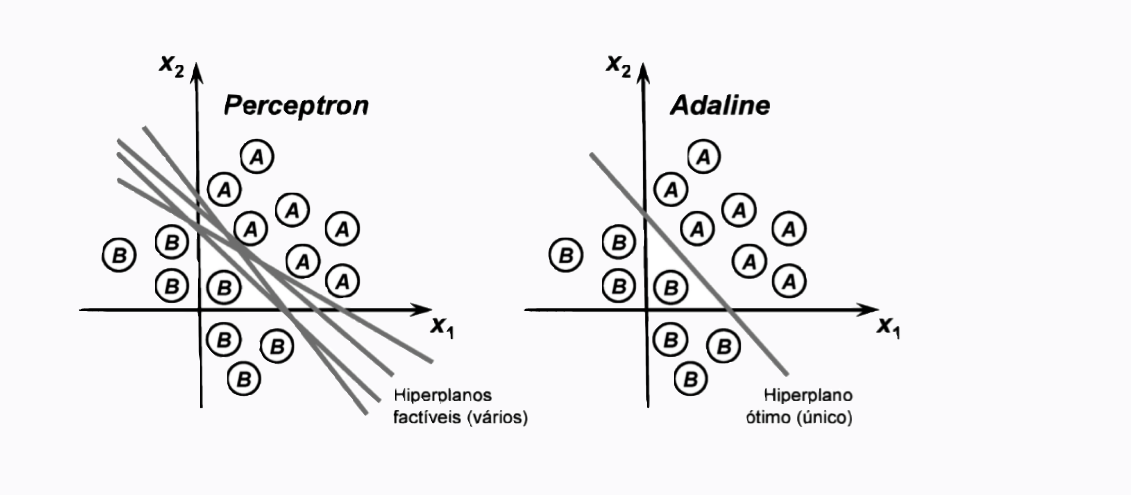

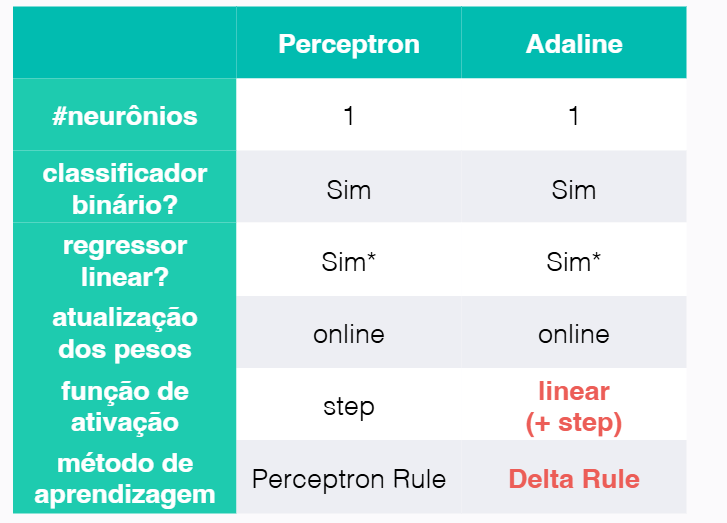

#### Imports e configuração

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs

%matplotlib inline

##Introdução
Poucos meses após a publicação do teorema da convergência do Perceptron por Rosenblatt, os engenheiros da Universidade de Stanford, Bernard Widrow e Marcian Hoff, publicaram um trabalho descrevendo uma rede neural muito parecida com o Perceptron, a Adaline (do inglês ADAptive LINear Element). Porém, ao invés de utilizar a função step como função de ativação, a Adaline utiliza função de ativação linear e tem uma nova regra de aprendizado supervisionado, conhecida como regra de Widrow-Hoff (ou regra delta, ou ainda regra LMS).

De fato, tanto o Perceptron quanto o Adaline possuem muitas características semelhantes e é comum ver o pessoal confundindo o Perceptron com o Adaline. Entre as principais semelhanças, podemos destacar:

- Ambos possuem apenas um neurônio de N entradas e apenas uma saída. Não há camadas escondidas.
- Ambos são classificadores lineares binários por definição, mas podemos adaptá-los para efetuar regressão linear, da mesma forma como vimos no notebook sobre o Perceptron. Na verdade, o código para treinar um Adaline para regressão é o mesmo de um Perceptron.
- Ambos tem o método de aprendizagem online. Isto é, a atualização dos pesos é efetuada amostra por amostra.
- Ambos tem uma função step para classificação. Porém, ao contrário do Perceptron, na Adaline ela não é utilizada na atualização dos pesos. Nós veremos por que a seguir.

Porém, a principal diferença entre o Perceptron e a Adaline é que o Perceptron utiliza os labels das classes para fazer a atualização dos pesos, enquanto a Adaline utiliza o resultado da função de ativação (linear) como valor contínuo de predição. Isto é, ao invés da saída ser discreta como no Perceptron (0 ou 1), na Adaline a saída pode ser qualquer valor contínuo. Essa diferença fica mais clara quando vemos a figura a seguir:

###Regressão

In [6]:
df = pd.read_csv('data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [7]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values.reshape(-1, 1)

print(x.shape, y.shape)

(25, 3) (25, 1)


In [8]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values.reshape(-1, 1)

print(x.shape, y.shape)

(25, 3) (25, 1)


Vamos normalizar os dados para cada coluna ser o 0 e 1:

In [9]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

Treinando o modelo

In [10]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 1e-2

for step in range(2001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2

    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: [505199.12265419]
step 200: [175.84522591]
step 400: [148.51661033]
step 600: [146.41736781]
step 800: [146.18318705]
step 1000: [146.15452229]
step 1200: [146.15105976]
step 1400: [146.15068384]
step 1600: [146.15065955]
step 1800: [146.15066494]
step 2000: [146.15066867]
w:  [array([8.72520986]), array([14.13947914]), array([26.3205057])]
b:  [150.71119275]


###Classificação

###Porta AND/OR

In [11]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# y = np.array([[0, 1, 1, 1]]).T # porta OR
y = np.array([0, 0, 0, 1]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4,)


####Python

In [12]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 0.1

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num Adaline?
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        #y_pred = 1 if y_pred > 0 else 0 -> removemos a linha para trasformar o perceptron em um adaline
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2

    if step%10 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 7.136642609245064
step 10: 0.4764968782053013
step 20: 0.33729874879038335
step 30: 0.3134224196571805
step 40: 0.30911317648176406
step 50: 0.308451803581993
step 60: 0.30844779928201493
step 70: 0.3085214035871101
step 80: 0.30857607478353677
step 90: 0.3086076554154769
step 100: 0.30862446048931985
w:  [0.5551485136199391, 0.5273637298382077]
b:  -0.27722338775972266


####Numpy

In [13]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1

learning_rate = 0.1

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num Adaline?
        y_pred = np.dot(x_n, w) + b
        #y_pred = np.where(y_pred > 0, 1, 0) -> essa linha para transformar o perceptron em um adaline
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2

    if step%10 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(x, w)+b))

step 0: 4.514327899010297
step 10: 0.7696658279029258
step 20: 0.4206472411507694
step 30: 0.3348384540660515
step 40: 0.31419631825429506
step 50: 0.3095034536688642
step 60: 0.3085851131444244
step 70: 0.30848898781937906
step 80: 0.3085334272463303
step 90: 0.30857932551383177
step 100: 0.30860839606455626
w:  [0.55474117 0.52692241]
b:  -0.2766507677883577
y_pred: [-0.27665077  0.25027164  0.2780904   0.80501281]


####Exercício de Classificação

(100, 2) (100,)


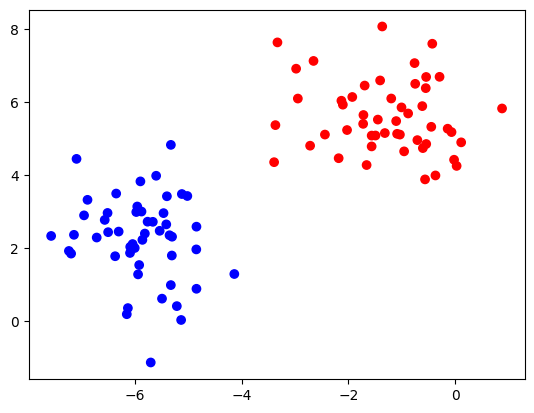

In [14]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [15]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh < 0.5, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

####Python

step 0: 113.24362318440036
step 100: 7.458132526893406
step 200: 4.620622989587485
step 300: 3.289320690220829
step 400: 2.6648772630551507
step 500: 2.3721051148257715
step 600: 2.234921148036543
step 700: 2.1706980147488286
step 800: 2.1406708888163175
step 900: 2.126658792417846
step 1000: 2.1201385831876776
w:  [0.13859267997217126, 0.0829768542705722]
b:  0.6631495132649987


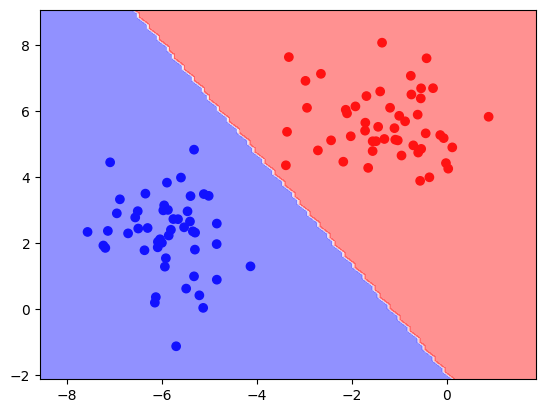

In [23]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 0.001

for step in range(1001): # <- tente estimar a #epochs
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2

    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

plot_linear_classifier(x, y, w, b)

####Numpy

step 0: 324.48803875653994
step 100: 2.2051463230820936
step 200: 2.1567713141918383
step 300: 2.1341681241016337
step 400: 2.1236301918948386
step 500: 2.1187333608852486
step 600: 2.1164689828550967
step 700: 2.1154295875714597
step 800: 2.1149578346507223
step 900: 2.1147474684839747
step 1000: 2.114656318418173
w:  [0.14221966 0.07820069]
b:  0.6967209834751201


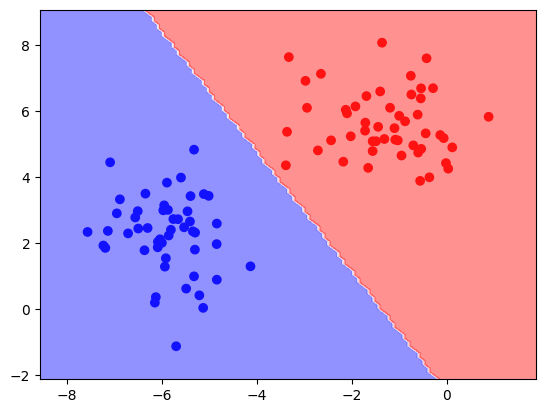

In [22]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1

learning_rate = 0.001

for step in range(1005):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2

    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

plot_linear_classifier(x, y, w, b)

#Referências
- http://sisne.org/Disciplinas/PosGrad/PsicoConex/aula6.pdf
- What is the difference between a Perceptron, Adaline, and neural network model?
- RNA – Adaline e Regra do Delta

CURSO usado e  RETIRADO o código para o NOTEBOOK:


https://copel.udemy.com/course/redes-neurais/learn/lecture/16221386#overview